# Data Exploration + Ward Mapping
For this week's group assignment, Yasmina and I will be working to join the Quality of Life (QoL) survey data from the [Gauteng City-Region Observatory (GCRO)](https://www.gcro.ac.za/outputs/datasets/) with a shapefile of the wards in the Gauteng region. After joining the survey data with the ward shapefile, I will conduct a data exploration. Specifically, I will be looking at variables relevant to transportation in the region.

### Importing the Libraries

In [1]:
import pandas as pd

import numpy as np

In [2]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
import contextily as ctx

import matplotlib.pyplot as plt

### Import the data

Adding in my imported data. The wards are a shapefile so I will use geopandas. The Quality of Life survey has no spatial data so I'm using pandas

In [4]:
wards = gpd.read_file('MDB_Wards_2020.zip', encoding="utf-8")

In [5]:
qol = pd.read_csv('qolsv_2017_2018_edited.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Data Exploration

I want to learn more about the datasets, so I will do .info()

In [6]:
qol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Columns: 105 entries, resp_id to Q15_21_party_choice
dtypes: float64(3), int64(9), object(93)
memory usage: 19.9+ MB


In [7]:
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         529 non-null    int64   
 1   Province    529 non-null    object  
 2   Municipali  529 non-null    object  
 3   CAT_B       529 non-null    object  
 4   WardNo      529 non-null    int64   
 5   District    529 non-null    object  
 6   DistrictCo  529 non-null    object  
 7   Date        529 non-null    object  
 8   WardID      529 non-null    object  
 9   WardLabel   529 non-null    object  
 10  Shape__Are  529 non-null    float64 
 11  Shape__Len  529 non-null    float64 
 12  geometry    529 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(8)
memory usage: 53.9+ KB


I want to see the visuals of both of my datasets so I'll use .head()

In [8]:
qol.head()

,resp_id,ward,munic,munic_recode,region,ea_code,sp_code,sp_name,mp_code,mp_name,...,Q9_17_Identify_self_with,Q9_20_Interracial_dating,Q11_12_working,Q11_20_employment,Q15_01_education,Q15_01_education_recode,Q15_02_age,Q15_02_age_recode,Q15_20_income,Q15_21_party_choice
0,7391,74201002,Emfuleni,Emfuleni,Sedibeng,76010738,760004018,Sebokeng Hostels,760004,Sebokeng,...,Religious group,Agree,Yes,"Employed full time, formal sector","Post graduate degree - e.g. Hons, MA, PhD",More,41,40-44,R6 401 - R12 800,ANC (African National Congress)
1,7392,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Race,Agree,No,NaN,"Grade 11, Std 9 or F IV",Secondary incomplete,42,40-44,R1 601 - R3 200,ANC (African National Congress)
2,7417,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Gender,Neither agree nor disagree,No,NaN,"Grade 12, Std 10, Matric",Matric,42,40-44,R1 601 - R3 200,ANC (African National Congress)
3,7418,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Race,Agree,No,NaN,"Grade 7, Std 5 or L5",Primary only,50,50-54,R801 - R1 600,NaN
4,7421,79800037,City of Johannesburg,Johannesburg,City of Johannesburg,79810806,798030045,Klipspruit,798030,Soweto,...,Gender,Agree,No,NaN,"Grade 11, Std 9 or F IV",Secondary incomplete,33,30-34,R401 - R800,DA (Democratic Alliance)


In [9]:
wards.head()

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,Shape__Are,Shape__Len,geometry
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,7.471513e+06,16412.790406,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
1,2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,5.893438e+06,12204.147922,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2,2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,5.162054e+06,11148.288066,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
3,2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,8.131083e+06,13451.889717,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
4,2900,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,5.578942e+07,41007.760780,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."


I want to explore some of the information in my QoL (qol) dataset to get more information about the respondents

In [10]:
qol['Q15_21_party_choice'].value_counts()

ANC (African National Congress)              11146
DA (Democratic Alliance)                      2276
Don't know                                    1785
Would not vote                                1755
EFF (Economic Freedom Fighters)               1605
Could not vote (not an SA citizen etc)        1105
IFP (Inkatha Freedom Party)                    188
Other party                                    157
Vryheidsfront Plus                              76
COPE (Congress of the People)                   60
PAC (Pan Africanist Congress of Azania)         49
ACDP (African Christian Democratic Party)       45
UDM (United Democratic Movement)                29
African Independent Congress                     9
Name: Q15_21_party_choice, dtype: int64

I can see that the majority of respondents identify with the African National Congress, followed by the Democratic Alliance. An almost equal number of people don't know their party choice or would not vote

In [11]:
qol['A1_Pop_group'].value_counts()

African         20964
White            2578
Coloured          892
Indian/Asian      370
Other              85
Name: A1_Pop_group, dtype: int64

According to the QoL survey, the 'A1_Pop_group' asks "To which population group does the respondent belong?" By examining this variable, I can see that the majority of respondents chose African, while the least number of respondents chose "other"

In [12]:
qol['A2_Sex'].value_counts()

Female    13253
Male      11636
Name: A2_Sex, dtype: int64

I want to see a plot of all the districts in the Gauteng region

Text(0.5, 1.0, 'Gauteng Districts')

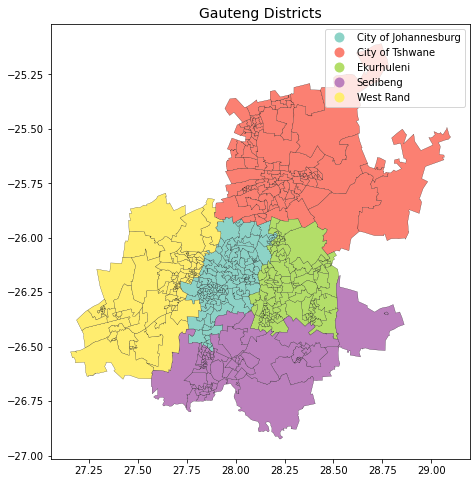

In [13]:
wards.plot(figsize=(8,8),
                   column='District',
           cmap='Set3',
                   edgecolor='black',
                   linewidth=0.2,
                   legend=True,
                  )
plt.title('Gauteng Districts', fontsize=14)

## Data Merge 

Before I merge the two datasets, I want to check that I have the same number of wards in each dataset. I think that if each dataset has the same number of wards, I can merge them without losing any information

In [14]:
qol['ward'].value_counts()

79800100    174
79800062     99
79700100     93
79900081     86
79700002     80
           ... 
74202007     31
74801003     31
74801021     30
74202012     30
74801039     29
Name: ward, Length: 529, dtype: int64

In [15]:
wards['WardID'].value_counts()

79800001    1
79700107    1
74201009    1
74201008    1
74201007    1
           ..
79900037    1
79900036    1
79900035    1
79900034    1
74805035    1
Name: WardID, Length: 529, dtype: int64

Each dataset has 529 wards (the number of wards in the Gauteng region, I know I can merge the data).

### Rename a column

I will start by renaming "ward" in the QoL dataset to "WardID"

In [16]:
qol = qol.rename(columns={'ward': 'WardID'})

I want to double check that the column was successfully renamed, so I will run a .head 

In [17]:
qol.head(2)

,resp_id,WardID,munic,munic_recode,region,ea_code,sp_code,sp_name,mp_code,mp_name,...,Q9_17_Identify_self_with,Q9_20_Interracial_dating,Q11_12_working,Q11_20_employment,Q15_01_education,Q15_01_education_recode,Q15_02_age,Q15_02_age_recode,Q15_20_income,Q15_21_party_choice
0,7391,74201002,Emfuleni,Emfuleni,Sedibeng,76010738,760004018,Sebokeng Hostels,760004,Sebokeng,...,Religious group,Agree,Yes,"Employed full time, formal sector","Post graduate degree - e.g. Hons, MA, PhD",More,41,40-44,R6 401 - R12 800,ANC (African National Congress)
1,7392,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Race,Agree,No,NaN,"Grade 11, Std 9 or F IV",Secondary incomplete,42,40-44,R1 601 - R3 200,ANC (African National Congress)


The column name is now "WardID" so I can now attempt to merge the two datasets

## Changing Datatypes

When I attempted to merge, I received an error letting me know I was trying to merge two different datatypes. I want to verify the type of data I have in each dataset, so I will run .dtypes for both.

In [18]:
wards.dtypes

FID              int64
Province        object
Municipali      object
CAT_B           object
WardNo           int64
District        object
DistrictCo      object
Date            object
WardID          object
WardLabel       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [19]:
qol.dtypes

resp_id                     int64
WardID                      int64
munic                      object
munic_recode               object
region                     object
                            ...  
Q15_01_education_recode    object
Q15_02_age                  int64
Q15_02_age_recode          object
Q15_20_income              object
Q15_21_party_choice        object
Length: 105, dtype: object

WardID in the "qol" dataset is an int64 (numeric characters) whereas the WardID in the "wards" dataset is an object (meaning the column has numbers and strings). 

After doing some research on the topic, I discovered the command .to_numeric to change datatypes. I just wanted to change the datatype in the wards "WardID" column so I ran the code below.

In [20]:
wards["WardID"] = pd.to_numeric(wards["WardID"])

I didn't receive an error message (woohoo!) So I think that means it ran successfully. Just to confirm, I will run .dtypes to see if WardID is now listed as an int64

In [21]:
wards.dtypes

FID              int64
Province        object
Municipali      object
CAT_B           object
WardNo           int64
District        object
DistrictCo      object
Date            object
WardID           int64
WardLabel       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

WardID in wards is now listed as an int64 so I believe I can successfully merge the two datasets. I will be using the code for attribute joins that Yoh recommended (can be found [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html))

In [22]:
wards = wards.merge(qol, on='WardID')

I didn't receive an error message so I think it worked (fingers crossed!) I will run .head() to see if the columns have been added

In [23]:
wards.head(2)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_17_Identify_self_with,Q9_20_Interracial_dating,Q11_12_working,Q11_20_employment,Q15_01_education,Q15_01_education_recode,Q15_02_age,Q15_02_age_recode,Q15_20_income,Q15_21_party_choice
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Religious group,Agree,Yes,"Self employed withown business,NOT working fro...","Grade 12, Std 10, Matric",Matric,35,35-39,R1 601 - R3 200,Don't know
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Gender,Agree,No,NaN,"Grade 11, Std 9 or F IV",Secondary incomplete,28,25-29,R6 401 - R12 800,ANC (African National Congress)


It appears that the WardLabel from the wards shapefile data has been added to the dataset! I will explore this new data to see how the original dataset has changed

In [24]:
wards.shape

(23606, 117)

I see we have 23606 rows and 117 columns. Previously the wards dataset had 105 columns so I know data merged

I want to see a list of the columns in this dataset, so I will use .to_list()

In [25]:
wards.columns.to_list()

['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'dwelling_count',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'A3_dwelling',
 'A3_dwelling_recode',
 'A3_recode_2',
 'Q3_01_birth_place',
 'Q3_01_recode',
 'Q3_02_country',
 'Q3_03_previous_residence',
 'Q3_04_year',
 'Q3_04_year_moved',
 'Q3_05_main_home',
 'Q3_06_home',
 'Q3_07_home',
 'Q3_08_visits',
 'Q3_09_visitors',
 'Q3_10_Retirement',
 'Q3_11_retirement_intention',
 'Q3_12_1',
 'Q3_12_2',
 'Q3_12_3',
 'Q3_12_4',
 'Q3_12_5',
 'Q3_12_6',
 'Q3_12_7',
 'Q3_12_8',
 'Q3_13_Language',
 'Q4_02_major_problem',
 'Q4_03_community',
 'Q4_04_lengthof_stay',
 'Q4_05_reason_coming',
 'Q5_01_frequent_trip',
 'Q5_01_recode',
 'Q5_02_non_movement',
 'Q5_02_01_trip',
 'Q5_03_dest

## Trim the data

Now that I have successfully merged my data and can see a list of column names, I want to trim my data. For this week's group project, I will be focusing on transport related questions from the [2017-2018 QoL survey](https://cdn.gcro.ac.za/media/documents/2018.12.13_QoL_V_questionnaire.pdf) from the GCRO. I went through each column in the survey and decided on which ones I wanted to keep for this assignment

In [26]:
wards_trimmed = wards[['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q3_01_birth_place',
 'Q3_01_recode',
 'Q3_03_previous_residence',
 'Q3_04_year', 
 'Q4_03_community',
 'Q4_04_lengthof_stay',
 'Q4_05_reason_coming',
 'Q5_01_frequent_trip',
 'Q5_01_recode',
 'Q5_02_01_trip',
 'Q5_07_Transp_Longdistance',
 'Q5_08_alternative_transport',
 'Q5_09_longest_travel',
 'Q5_11_BRT',
 'Q5_12_satisfaction_BRT',
 'Q5_13_why_use_BRT',
 'Q5_14_whatwould_encourage_BRT_us',
 'Q5_15_transport_expenditure',
 'Q5_16_transport_improvement',
 'Q5_18_proximity_public_transport',
                       'Q11_12_working',
 'Q11_20_employment',
 'Q15_01_education',
 'Q15_01_education_recode',
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_20_income',
 'Q15_21_party_choice']].copy()

## Renaming columns

I want to rename the columns that don't provide enough information. I renamed each column based on the variable named in the QoL survey

In [27]:
wards_trimmed = wards_trimmed.rename(columns={
                                              'Q5_11_BRT': 'Q5_11_BRT_Freq',
                                              'Q5_18_proximity_public_transport': 'Q5_18_walk_proximity_public_transport',
                                              })

I want to confirm that the column names have been changed so I will run a .columns.to_list()

In [28]:
wards_trimmed.columns.to_list()

['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q3_01_birth_place',
 'Q3_01_recode',
 'Q3_03_previous_residence',
 'Q3_04_year',
 'Q4_03_community',
 'Q4_04_lengthof_stay',
 'Q4_05_reason_coming',
 'Q5_01_frequent_trip',
 'Q5_01_recode',
 'Q5_02_01_trip',
 'Q5_07_Transp_Longdistance',
 'Q5_08_alternative_transport',
 'Q5_09_longest_travel',
 'Q5_11_BRT_Freq',
 'Q5_12_satisfaction_BRT',
 'Q5_13_why_use_BRT',
 'Q5_14_whatwould_encourage_BRT_us',
 'Q5_15_transport_expenditure',
 'Q5_16_transport_improvement',
 'Q5_18_walk_proximity_public_transport',
 'Q11_12_working',
 'Q11_20_employment',
 'Q15_01_education',
 'Q15_01_education_recode',
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_20_income',
 'Q15_21_party_choice']

## Info and plots

I want to look at some stats of my dataset. There's a question on the QoL survey that asks about how respondents' transportation expenditure. I'm curious to see the responses to this question

In [29]:
wards_trimmed['Q5_15_transport_expenditure'].value_counts()

R501 - R1 000      4133
R251 - R500        3920
R101 - R250        3351
R51 - R100         3009
R1 001 - R2 000    2488
R1 - R50           1921
Don't know         1875
R0                 1143
R2 001 or more      850
Name: Q5_15_transport_expenditure, dtype: int64

Question Q5_01 asks participants to think about a trip they make frequently and the mode of transport they use to get there. I would like to see the breakdown of this

In [30]:
wards_trimmed['Q5_01_frequent_trip'].value_counts()

To go to work                                   7722
Shopping                                        6744
Other purpose                                   4116
To look for work (Currently unemployed)         1811
To go to the place of study                     1226
I don't make any trips                           996
Taking children to school                        543
To go to a place of leisure or entertainment     448
Name: Q5_01_frequent_trip, dtype: int64

<AxesSubplot:>

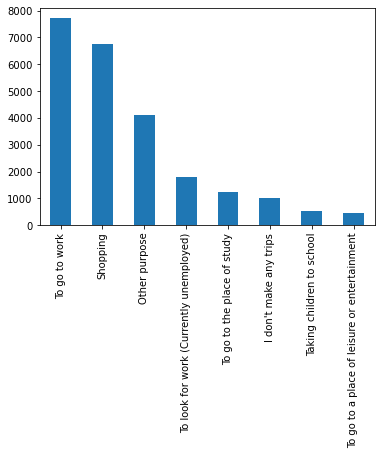

In [31]:
# I want to plot birth place as a bar plot

freq_trip=wards_trimmed['Q5_01_frequent_trip'].value_counts()

freq_trip.plot.bar()

I would like to also see the responses for Q5_18 which asks about walking proximity to public transport

In [32]:
wards_trimmed['Q5_18_walk_proximity_public_transport'].value_counts()

Up to 10 minutes         15408
From 11 to 20 minutes     4615
Don't know                1993
From 21 to 30 minutes     1152
From 31 to 40 minutes      257
More than 40 minutes       181
Name: Q5_18_walk_proximity_public_transport, dtype: int64

In [33]:
# i want to save this as a dataframe

prox_pt = wards_trimmed['Q5_18_walk_proximity_public_transport'].value_counts()

In [34]:
# convert to a dataframe so we can manipulate it

prox_pt = prox_pt.reset_index()

type(prox_pt)

pandas.core.frame.DataFrame

In [35]:
prox_pt

,index,Q5_18_walk_proximity_public_transport
0,Up to 10 minutes,15408
1,From 11 to 20 minutes,4615
2,Don't know,1993
3,From 21 to 30 minutes,1152
4,From 31 to 40 minutes,257
5,More than 40 minutes,181


In [36]:
# I want to rename the columns

prox_pt.columns = ['Q5_18 Walk Prox. to Public Transport', 'Count']

prox_pt

,Q5_18 Walk Prox. to Public Transport,Count
0,Up to 10 minutes,15408
1,From 11 to 20 minutes,4615
2,Don't know,1993
3,From 21 to 30 minutes,1152
4,From 31 to 40 minutes,257
5,More than 40 minutes,181


I think a pie chart will be a good way to see the percentage of the responsdents who live within a certain number of minutes to public transport

Text(0.5, 1.0, "Respondents' Walking Proximity to Public Transport")

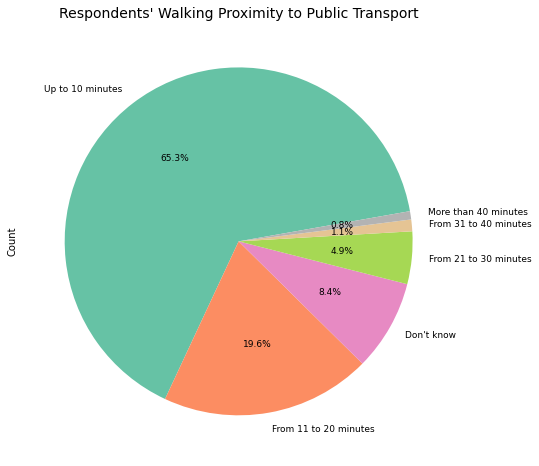

In [37]:
plt.figure(figsize=(21,8))
ax1 = plt.subplot(121, aspect = 'equal')
prox_pt.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=prox_pt['Q5_18 Walk Prox. to Public Transport'],
             legend=False, fontsize=9)
plt.title("Respondents' Walking Proximity to Public Transport", fontsize = 14)

## Normalizing Data

I want to know what percentage of each ward live within a 10 minute walking distance of public transportation and what percentage of people use Rea Vaya. Normalizing the data will allow me to evaluate this

### Rea Vaya (BRT) Use

I want to see the breakdown of BRT use by ward. By using crosstab(), I can see the responses of Q5_11_BRT_Freq by ward. I will save this information as a new variable BRT_use

In [38]:
BRT_use = pd.crosstab(index=wards_trimmed['WardID'],
                        columns=wards_trimmed['Q5_11_BRT_Freq'],
                       margins=True,
                       margins_name='Total Number')

In [39]:
BRT_use

Q5_11_BRT_Freq,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number
WardID,,,,,,
74201001,0,0,0,35,0,35
74201002,2,1,1,33,0,37
74201003,1,0,0,32,0,33
74201004,0,0,0,33,1,34
74201005,0,0,0,30,0,30
...,...,...,...,...,...,...
79900104,0,1,1,29,1,32
79900105,0,0,0,30,0,30
79900106,2,5,0,30,0,37


In my command I used, "total number" to get a tally of the total number of responses.

I want to see the percentage breakdown of BRT use by ward. To do so I will create new columns, and populate it with normalized data to get the percent of the total value

In [40]:
# create new columns and populate it with normalized data

BRT_use['Percent A few times a month'] = BRT_use['A few times a month']/BRT_use['Total Number']*100

BRT_use['Percent Every few months'] = BRT_use['Every few months']/BRT_use['Total Number']*100

BRT_use['Percent Most days'] = BRT_use['Most days']/BRT_use['Total Number']*100

BRT_use['Percant Never'] = BRT_use['Never']/BRT_use['Total Number']*100

BRT_use['Percent Once or twice a week'] = BRT_use['Once or twice a week']/BRT_use['Total Number']*100

In [41]:
BRT_use.sample(5)

Q5_11_BRT_Freq,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number,Percent A few times a month,Percent Every few months,Percent Most days,Percant Never,Percent Once or twice a week
WardID,,,,,,,,,,,
79800082,6,8,4,43,2,63,9.523810,12.698413,6.349206,68.253968,3.174603
79800017,2,2,0,40,5,49,4.081633,4.081633,0.000000,81.632653,10.204082
79900020,2,0,2,43,0,47,4.255319,0.000000,4.255319,91.489362,0.000000
79700006,3,3,2,43,1,52,5.769231,5.769231,3.846154,82.692308,1.923077
79800129,2,2,2,51,1,58,3.448276,3.448276,3.448276,87.931034,1.724138


Now I can see the percentage of BRT use by ward. But I want to be able to map this information. This dataframe does not have any geometry column so in order to map it, I will merge it with my wards_trimmed data (which does have geometry)

In [42]:
#Merge this new dataframe with wards_trimmed so I can map it

wards_BRT_use = wards_trimmed.merge(BRT_use, on='WardID')

In [43]:
wards_BRT_use.head(2)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,WardID,WardLabel,Shape__Are,...,Every few months,Most days,Never,Once or twice a week,Total Number,Percent A few times a month,Percent Every few months,Percent Most days,Percant Never,Percent Once or twice a week
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,79800001,JHB_1,7.471513e+06,...,3,0,51,0,55,1.818182,5.454545,0.0,92.727273,0.0
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,79800001,JHB_1,7.471513e+06,...,3,0,51,0,55,1.818182,5.454545,0.0,92.727273,0.0


Text(0.5, 1.0, 'Percent using Rea Vaya once or twice a week')

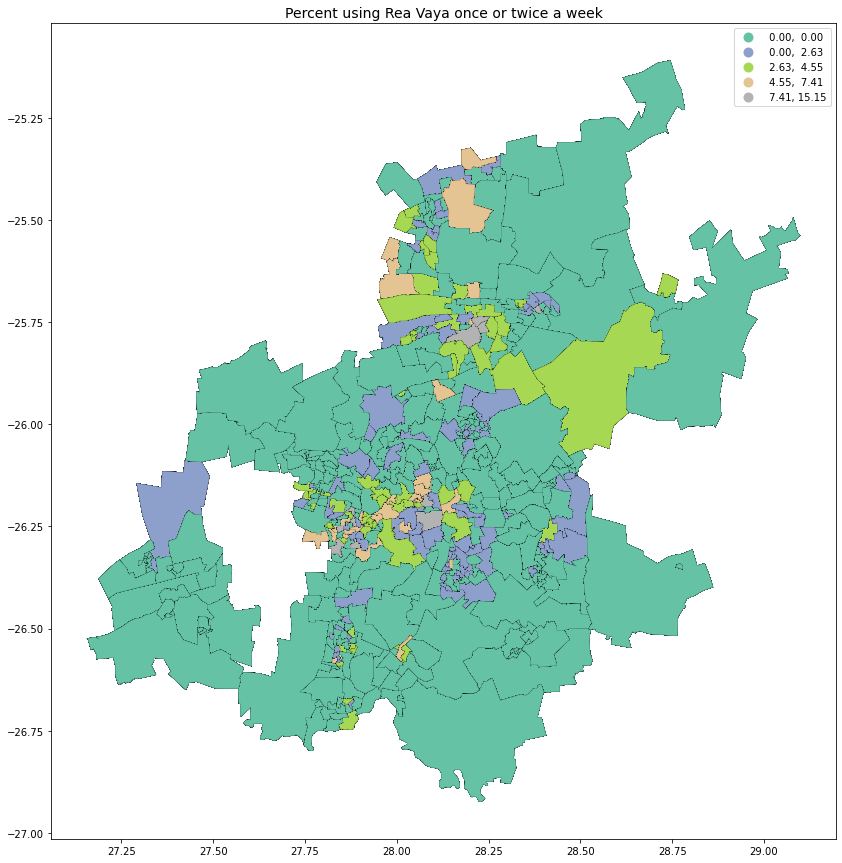

In [44]:
wards_BRT_use.plot(figsize=(15,15),
                   column='Percent Once or twice a week',
                   cmap='Set2',
                   scheme='NaturalBreaks',
                   edgecolor='black',
                   linewidth=0.1,
                   legend=True,
                  )
plt.title("Percent using Rea Vaya once or twice a week", fontsize = 14)

# Data Loss

When I plotted the respondents use of BRT, I see that there is a "slice" of my data missing. It seems that Rand West City is missing from my dataset. I scrolled up and it was there before I merged the data, so I believe it got "lost" along the way. My best guess is that it was lost when I converted the "wardID" column from objects to integers. I have attempted to use missing_kwds to label the missing data but continously received errors

## More Mapping

### Walking proximity to public transport

I want to see the breakdown of walking proxmity to public transport by ward. By using crosstab(), I can see the responses of Q5_18 by ward. I will save this information as a new variable prox_pt. 

In [45]:
prox_pt = pd.crosstab(index=wards_trimmed['WardID'],
                        columns=wards_trimmed['Q5_18_walk_proximity_public_transport'],
                       margins=True,
                       margins_name='Total Number')

In [46]:
prox_pt

Q5_18_walk_proximity_public_transport,Don't know,From 11 to 20 minutes,From 21 to 30 minutes,From 31 to 40 minutes,More than 40 minutes,Up to 10 minutes,Total Number
WardID,,,,,,,
74201001,7,6,1,1,2,19,36
74201002,2,9,2,0,0,24,37
74201003,0,15,2,3,0,14,34
74201004,5,13,0,0,0,16,34
74201005,8,13,4,0,0,6,31
...,...,...,...,...,...,...,...
79900104,1,8,4,2,0,22,37
79900105,6,7,3,0,1,14,31
79900106,1,9,0,0,1,27,38


Using crosstab() I have grouped the wards_trimmed data by WardID and Q5_18 and I can see the number of responses to the question by ward.

I want to get the percentage of respondents in each ward that live up to 10 minutes walking from public transport. To do so I will create a new column, and populate it with normalized data to get the percent of the total value

In [47]:
# create a new column and populate it with normalized data
prox_pt['Percent Up to 10 Min'] = prox_pt['Up to 10 minutes']/prox_pt['Total Number']*100

In [48]:
prox_pt.sample(5)

Q5_18_walk_proximity_public_transport,Don't know,From 11 to 20 minutes,From 21 to 30 minutes,From 31 to 40 minutes,More than 40 minutes,Up to 10 minutes,Total Number,Percent Up to 10 Min
WardID,,,,,,,,
79700074,1,5,4,1,1,42,54,77.777778
79700081,0,17,0,1,1,38,57,66.666667
79800114,1,12,1,0,0,41,55,74.545455
79800054,12,16,3,0,0,21,52,40.384615
74201042,0,16,4,1,0,24,45,53.333333


I will merge this with my wards_trimmed data (which does have geometry) in order to be able to map it

In [49]:
wards_pt_prox = wards_trimmed.merge(prox_pt, on='WardID')

In [50]:
# Make sure the data merged by printing head
wards_pt_prox.head(2)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,WardID,WardLabel,Shape__Are,...,Q15_20_income,Q15_21_party_choice,Don't know,From 11 to 20 minutes,From 21 to 30 minutes,From 31 to 40 minutes,More than 40 minutes,Up to 10 minutes,Total Number,Percent Up to 10 Min
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,79800001,JHB_1,7.471513e+06,...,R1 601 - R3 200,Don't know,0,20,4,2,0,29,55,52.727273
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,79800001,JHB_1,7.471513e+06,...,R6 401 - R12 800,ANC (African National Congress),0,20,4,2,0,29,55,52.727273


I want to map the wards in which over 80% of respondents are within a 10 minute walking distance of pubic transportation and I want to include a basemap. 

<AxesSubplot:>

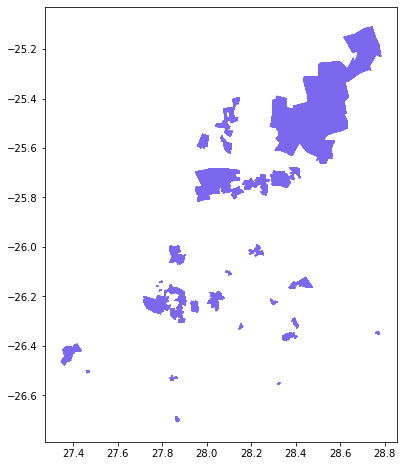

In [51]:
wards_pt_prox[wards_pt_prox['Percent Up to 10 Min'] > 80]

# Plot it in medium slate blue

wards_pt_prox[wards_pt_prox['Percent Up to 10 Min'] > 80].plot(figsize=(10,8),color="mediumslateblue")

In [52]:
# reproject to Web Mercator
wards_pt_prox_web_mercator = wards_pt_prox.to_crs(epsg=3857)

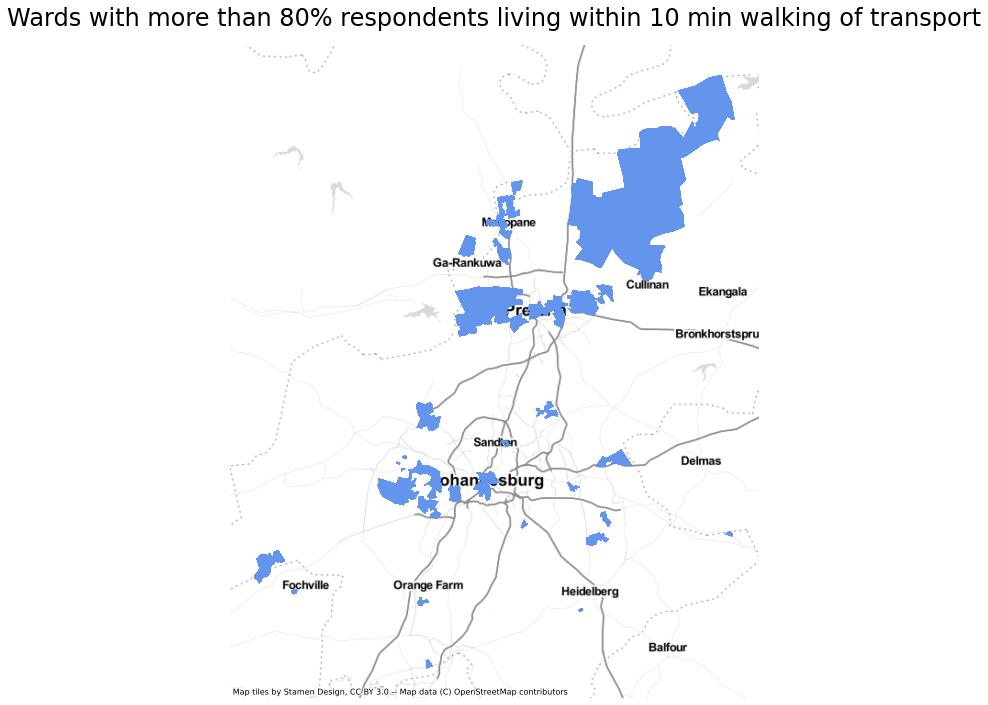

In [53]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
wards_pt_prox_web_mercator[wards_pt_prox_web_mercator['Percent Up to 10 Min'] > 80].plot(ax=ax, 
                                                                           alpha=0.8, 
                                                                           color="cornflowerblue")

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Wards with more than 80% respondents living within 10 min walking of transport',fontsize=24, pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

#### By conducting data exploration, filtering my data, and performing some data merges, I have been able to create plots and maps with information on proximity to public transit and Bus Rapid Transit Use, which will be useful in our final project